In [19]:
from __future__ import division #(for python 2.7 compatibility)
import par
import modes
import spectra
import numpy as np
import numba
import matplotlib.pyplot as plt
import pickle
from numpy import log10,sqrt,pi

In [3]:
A = np.linspace(par.a0, par.a_rec, 2*par.NT)
K = np.linspace(1,1000,par.NK)

#@numba.njit
def square_basis(NC, theta):
    height = par.NT//NC
    width = par.NK//NC
    out = np.zeros((par.NK, par.NT))
    for i in range(NC**2):
        r,c = i//NC, i%NC
        out[r*width:(r+1)*width, c*height:(c+1)*height] = theta[i]
    out[:,A[::2] < par.a0_pca]=0
    return out

#@numba.njit
def get_square(n, val):
    height = par.NT//par.NC
    width = par.NK//par.NC
    out = np.zeros((par.NK, par.NT))
    r,c = n//par.NC, n%par.NC
    out[r*width:(r+1)*width, c*height:(c+1)*height] = val
    out[:,A[::2] < par.a0_pca]=0
    return out


In [4]:
def get_PC(NC):
    Cl_err = spectra.get_Cl_err()
    J = pickle.load(open("data/J_cs2_"+str(NC)+".p", "rb"))
    Sigma = np.diag(Cl_err)


    # just using Identity as covariance matrix for now
    F = np.transpose(J)@Sigma@J
    u, s, v = np.linalg.svd(F)
    D, V = np.linalg.eig(F)
    # principal vectors are currently defined as the rank-ordered left singular vectors
    PV = np.real(u) 
    #PC = B@PV
    plt.show()
    PC = np.zeros((10, par.NK, par.NT))
    for i in range(10):
        PC[i,:,:] = square_basis(NC, PV[:,i])
        PC[i,:,:] = PC[i,:,:]/np.sum(PC[i,:,:]**2)
    return PC

In [31]:
plt.rcParams.update(par.plot_params)
J_16 =  pickle.load(open("data/J_cs2_16.p", "rb"))
J_32 =  pickle.load(open("data/J_cs2_32.p", "rb"))
J_64 =  pickle.load(open("data/J_cs2_64.p", "rb"))
J_128 =  pickle.load(open("data/J_cs2_128.p", "rb"))
F_16 = J_16.T@J_16
F_32 = J_32.T@J_32
F_64 = J_64.T@J_64
F_128 = J_128.T@J_128

infl_16 = log10(sqrt(square_basis(16, np.diag(F_16))))
infl_32 = log10(sqrt(square_basis(32, np.diag(F_32))))
infl_64 = log10(sqrt(square_basis(64, np.diag(F_64))))
infl_128 = log10(sqrt(square_basis(128, np.diag(F_128))))

err_16 = abs(infl_32 - infl_16)/abs(infl_32)
err_32 = abs(infl_64 - infl_32)/abs(infl_64)
err_64 = abs(infl_128 - infl_64)/abs(infl_128)
#plt.pcolor(A[::2], K, log(sqrt(infl_16)))


C:\Users\Max Aifer\.conda\envs\quantum\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Max Aifer\.conda\envs\quantum\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
C:\Users\Max Aifer\.conda\envs\quantum\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
C:\Users\Max Aifer\.conda\envs\quantum\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Max Aifer\.conda\envs\quantum\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()
C:\Users\Max Aifer\.conda\envs\quantum\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract
C:\Users\Max Aifer\.conda\envs\quantum\lib\site-package

In [32]:
# compute horizon to plot horizon crossing:
H =  A * par.H0 * np.sqrt(par.OmegaM0*A**-3 + par.OmegaR0*A**-4 +  par.OmegaL0 ) 
TAU =  par.tau0 + modes.trapz(A, 1/(A * H))
k_horizon = 2*pi/TAU

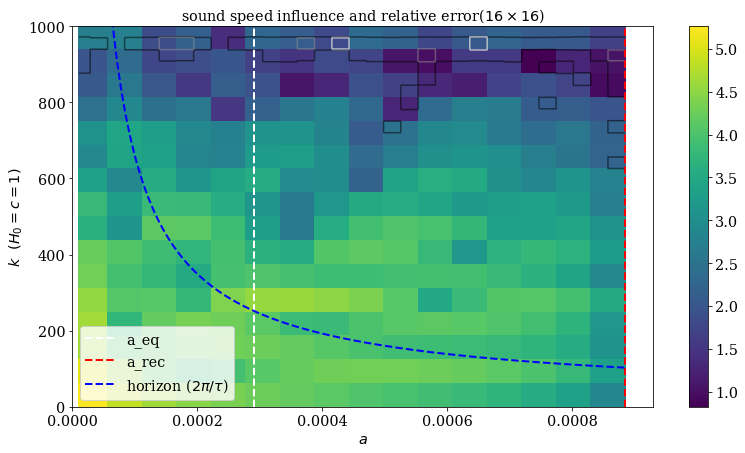

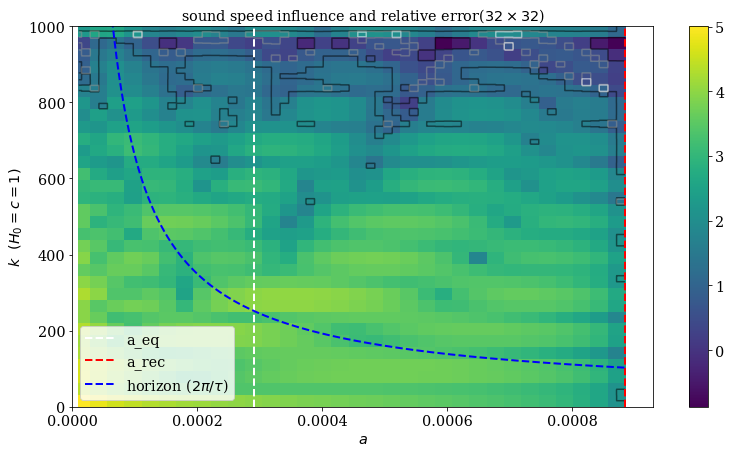

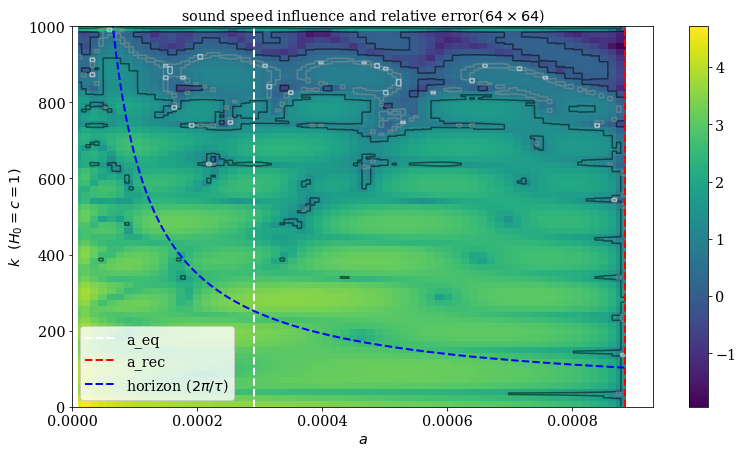

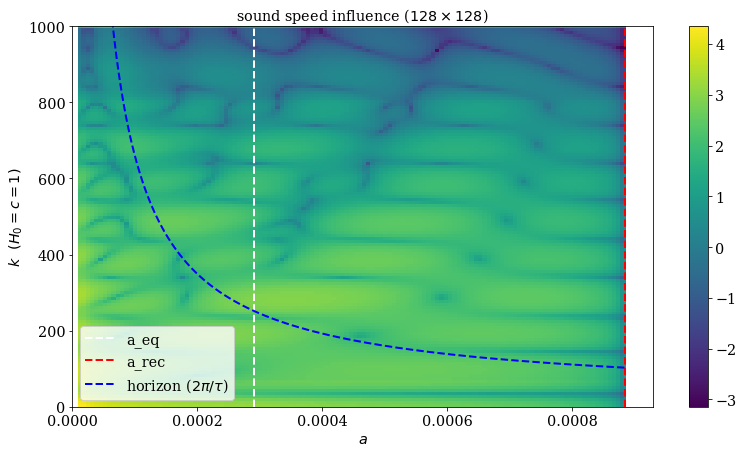

In [33]:
plt.title(r'sound speed influence and relative error($16\times 16$)')
plt.pcolor(A[::2],K, infl_16)
plt.colorbar()
plt.contour(A[::2],K,err_16, colors=['black', 'xkcd:grey', 'white'],alpha = 0.5,levels=[1, 10, 100])
plt.xlabel(r'$a$')
plt.ylabel(r'$k$  $(H_0 = c = 1)$')

plt.axvline(par.a_eq, color='white', linewidth=2, linestyle='--')
plt.axvline(par.a_rec, color='red', linewidth=2, linestyle='--')
plt.plot(A,k_horizon, color='blue', linewidth=2, linestyle='--')
plt.legend(['a_eq', 'a_rec', r'horizon ($2\pi/\tau$)'])
plt.xlim(0, 1.05*par.a_rec)
plt.ylim(0, par.k_high)

plt.show()

plt.title(r'sound speed influence and relative error($32\times 32$)')
plt.pcolor(A[::2],K, infl_32)
plt.colorbar()
plt.contour(A[::2],K,err_32, colors=['black', 'xkcd:grey', 'white'],alpha = 0.5,levels=[1, 10, 100])
plt.xlabel(r'$a$')
plt.ylabel(r'$k$  $(H_0 = c = 1)$')

plt.axvline(par.a_eq, color='white', linewidth=2, linestyle='--')
plt.axvline(par.a_rec, color='red', linewidth=2, linestyle='--')
plt.plot(A,k_horizon, color='blue', linewidth=2, linestyle='--')
plt.legend(['a_eq', 'a_rec', r'horizon ($2\pi/\tau$)'])
plt.xlim(0, 1.05*par.a_rec)
plt.ylim(0, par.k_high)
plt.show()

plt.title(r'sound speed influence and relative error($64\times 64$)')
plt.pcolor(A[::2],K, infl_64)
plt.colorbar()
plt.contour(A[::2],K,err_64, colors=['black', 'xkcd:grey', 'white'],alpha = 0.5,levels=[1, 10, 100])
plt.xlabel(r'$a$')
plt.ylabel(r'$k$  $(H_0 = c = 1)$')

plt.axvline(par.a_eq, color='white', linewidth=2, linestyle='--')
plt.axvline(par.a_rec, color='red', linewidth=2, linestyle='--')
plt.plot(A,k_horizon, color='blue', linewidth=2, linestyle='--')
plt.legend(['a_eq', 'a_rec', r'horizon ($2\pi/\tau$)'])
plt.xlim(0, 1.05*par.a_rec)
plt.ylim(0, par.k_high)

plt.show()

plt.title(r'sound speed influence ($128\times 128$)')
plt.pcolor(A[::2],K, infl_128)
plt.colorbar()
plt.xlabel(r'$a$')
plt.ylabel(r'$k$  $(H_0 = c = 1)$')

plt.axvline(par.a_eq, color='white', linewidth=2, linestyle='--')
plt.axvline(par.a_rec, color='red', linewidth=2, linestyle='--')
plt.plot(A,k_horizon, color='blue', linewidth=2, linestyle='--')
plt.legend(['a_eq', 'a_rec', r'horizon ($2\pi/\tau$)'])
plt.xlim(0, 1.05*par.a_rec)
plt.ylim(0, par.k_high)

plt.show()